### Homework for Data Science Crash course

In [168]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import mean_absolute_error

# Use 4 different neural networks
from sklearn.neural_network import MLPRegressor
# from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel
from sklearn.ensemble import ExtraTreesRegressor

In [2]:
# export our datasest
usd_rates = pd.read_excel("usd_rate.xlsx")

In [6]:
# checking if DS got correctly exported and what data it has
usd_rates.head()

,nominal,data,curs,cdx
0,1,2017-01-10,59.8961,Доллар США
1,1,2017-01-11,59.9533,Доллар США
2,1,2017-01-12,60.1614,Доллар США
3,1,2017-01-13,59.4978,Доллар США
4,1,2017-01-14,59.3700,Доллар США


In [9]:
# getting only rates values as Series
curs = usd_rates.curs

In [13]:
# predicting USD rate for next 7 days
future = 7

# based on 14 days in the past
past = 14

start = past
end = len(curs) - future

In [44]:
# getting multidimensional array, where each index is columns data that belongs to appropriate day in our 'past+future' slice
# additionally it has to be convereted to a list, otherswise it shows NaN except for rate values
raw_df = [list(curs[(day-past):(day+future)]) for day in range(start, end)]

In [41]:
# generating columns for our DF
past_columns = [f"past_{i+1}" for i in range(past)]

future_columns = [f"future_{i+1}" for i in range(future)]

In [45]:
# converting our md array to DF using columns we've just created
df = pd.DataFrame(data=raw_df, columns=(past_columns+future_columns))

In [49]:
# checking a newly created df
df.head()

,past_1,past_2,past_3,past_4,past_5,past_6,past_7,past_8,past_9,past_10,...,past_12,past_13,past_14,future_1,future_2,future_3,future_4,future_5,future_6,future_7
0,59.8961,59.9533,60.1614,59.4978,59.3700,59.6067,59.4015,59.1830,59.3521,59.6697,...,59.2168,59.1489,59.6356,60.3196,60.1618,60.0851,60.3099,59.9858,59.3137,58.7121
1,59.9533,60.1614,59.4978,59.3700,59.6067,59.4015,59.1830,59.3521,59.6697,59.5034,...,59.1489,59.6356,60.3196,60.1618,60.0851,60.3099,59.9858,59.3137,58.7121,59.1933
2,60.1614,59.4978,59.3700,59.6067,59.4015,59.1830,59.3521,59.6697,59.5034,59.2168,...,59.6356,60.3196,60.1618,60.0851,60.3099,59.9858,59.3137,58.7121,59.1933,59.5129
3,59.4978,59.3700,59.6067,59.4015,59.1830,59.3521,59.6697,59.5034,59.2168,59.1489,...,60.3196,60.1618,60.0851,60.3099,59.9858,59.3137,58.7121,59.1933,59.5129,59.0235
4,59.3700,59.6067,59.4015,59.1830,59.3521,59.6697,59.5034,59.2168,59.1489,59.6356,...,60.1618,60.0851,60.3099,59.9858,59.3137,58.7121,59.1933,59.5129,59.0235,58.8457


In [114]:
# training slice data or a textbook

# input data
X = df[past_columns][:-1]
Y = df[future_columns][:-1]

In [119]:
# testing slice data for examination
X_test = df[past_columns][-1:]
Y_test = df[future_columns][-1:]

In [122]:
# Real values to test correctness of our predictions
real_values = Y_test.iloc[0]

1. MLPRegressor model

In [120]:
# Creating and training our model

# hidden_layer_sizes=(50, 50, 50) 3 layers of neurons
# 'random_state=42' helps you normalize prediction, to get predictable output. Not affecting your model

# using science method of poking, trying to improve the results of prediction with hidden_layer_sizes=(100, 100, 200)

MLP = MLPRegressor(max_iter=10000, hidden_layer_sizes=(100, 100, 200), random_state=42).fit(X, Y)

0.4165261890993049

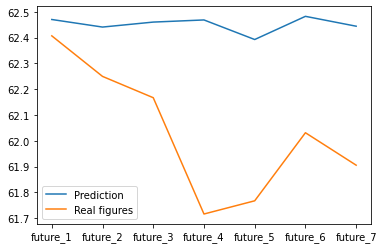

In [153]:
# MLP prediction
MLP_prediction = MLP.predict(X_test)[0]

plt.plot(MLP_prediction, label='Prediction')
plt.plot(real_values, label='Real figures')

plt.legend()

# unbelievable! our MLP predictions got improved to 0.41
mean_absolute_error(MLP_prediction, real_values)

2. RandomForestRegressor model

In [151]:
# Creating and training our RandomForestRegressor model
RF = RandomForestRegressor(max_depth=2, random_state=42).fit(X, Y)

1.5297278233690659

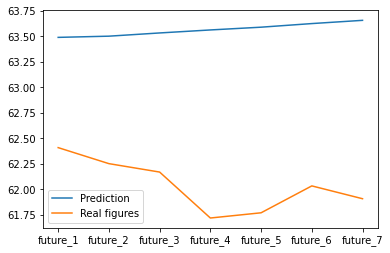

In [152]:
# RandomForestRegressor prediction
RF_prediction = RF.predict(X_test)[0]

plt.plot(RF_prediction, label='Prediction')
plt.plot(real_values, label='Real figures')

plt.legend()

mean_absolute_error(RF_prediction, real_values)

3. KernelRidge model

In [157]:
# Creating and training our KernelRidge model
KR = KernelRidge(alpha=1.0).fit(X, Y)

1.5297278233690659

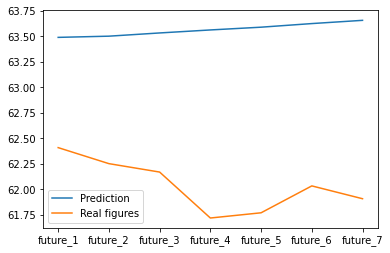

In [159]:
# KR_prediction prediction
KR_prediction = RF.predict(X_test)[0]

plt.plot(KR_prediction, label='Prediction')
plt.plot(real_values, label='Real figures')

plt.legend()

mean_absolute_error(KR_prediction, real_values)

4. GaussianProcessRegressor

In [166]:
# Creating and training our GaussianProcessRegressor model
# kernels needed for Gaussian Regressor
kernel = DotProduct() + WhiteKernel()
GP = GaussianProcessRegressor(kernel=kernel, random_state=42).fit(X, Y)

0.5838747938023506

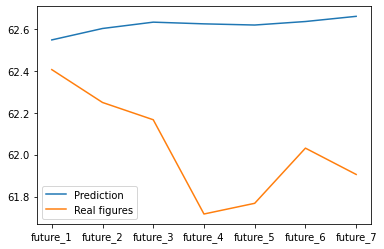

In [167]:
# GP_prediction prediction
GP_prediction = GP.predict(X_test)[0]

plt.plot(GP_prediction, label='Prediction')
plt.plot(real_values, label='Real figures')

plt.legend()

mean_absolute_error(GP_prediction, real_values)

5. ExtraTreesRegressor

In [170]:
# Creating and training our ExtraTreesRegressor model
ET = ExtraTreesRegressor(n_estimators=100, random_state=42).fit(X, Y)

0.7089290000000048

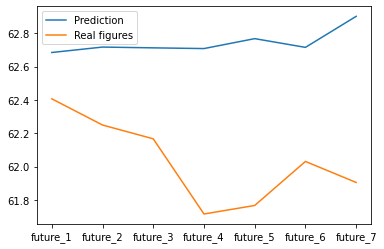

In [171]:
# ET_prediction prediction
ET_prediction = ET.predict(X_test)[0]

plt.plot(ET_prediction, label='Prediction')
plt.plot(real_values, label='Real figures')

plt.legend()

mean_absolute_error(ET_prediction, real_values)

### Take-aways:
* clearly we could see that making USD rate predictions based on only history rate values is not enough, or probably not possible at all using other data inputs, otherwise someone who could do this would be very rich?
* what we do here is just for testing purpose and for fun of course
* and just for a good measure we could see that the winner of all models is - MLP model that predicted `0.41`
* hooray!
